In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
digits= load_digits()
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("cleaned_training.csv",index_col=0)

In [3]:
train_data["TotLivingSF"] = train_data["GrLivArea"] + train_data["TotalBsmtSF"] - train_data["LowQualFinSF"]   

In [4]:
train_data["AgeSold"] = train_data["YrSold"] - train_data["YearBuilt"]

In [5]:
train_data = train_data[["TotLivingSF","OverallQual","YearBuilt","AgeSold","ExterQual","GarageCars","CentralAir","YearRemodAdd","LotArea","OverallCond","FullBath","KitchenQual","Fireplaces","FireplaceQu","MSZoning","LotFrontage","BedroomAbvGr","Neighborhood","SalePrice"]]

In [6]:
X = train_data.iloc[:,:-1].values
y = np.log(train_data.iloc[:,-1]).values

In [7]:
train_data["ExterQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
train_data["KitchenQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
train_data["FireplaceQu"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)


In [8]:
data = train_data.iloc[:,:-1]
data_encoded = pd.get_dummies(data,columns=["CentralAir","MSZoning","Neighborhood"],drop_first=True)

In [9]:
X = data_encoded.values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 0)


In [11]:
model = RandomForestRegressor(n_estimators = 400, n_jobs=-1, oob_score=False,min_samples_leaf = 1, max_features = 0.4)

In [12]:
# Fit and run the model
model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.4, n_estimators=400, n_jobs=-1)

In [13]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.4, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(max_features=0.4, n_estimators=400, n_jobs=-1)

In [14]:
model.score(X_test, y_test)

0.892118889555842

In [15]:
y_pred = model.predict(X_test)
y_pred_train=model.predict(X_train)

Training Score: 0.9830260231952976
Testing Score: 0.8921188895558418
MSE_train: 0.0027423292661325686
MSE: 0.01666883280746004


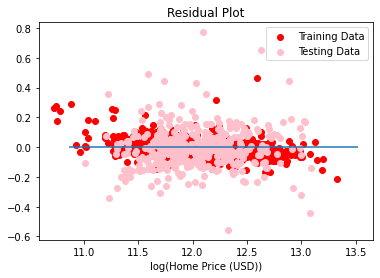

In [16]:
train_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
MSE_train= mean_squared_error(y_train,y_pred_train) 
MSE = mean_squared_error(y_test,y_pred)
print(f"Training Score: {train_score}")
print(f"Testing Score: {testing_score}")
print(f"MSE_train: {MSE_train}")
print(f"MSE: {MSE}")


plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="red", label="Training Data")
plt.scatter(y_pred, y_pred - y_test, c="pink", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.xlabel("log(Home Price (USD))")
plt.show()

In [18]:
actual_predictions = pd.DataFrame({"actual":y_test,"predictions":y_pred})
actual_predictions[["actual","predictions"]] = np.exp(actual_predictions[["actual","predictions"]])
actual_predictions.to_csv("randomforest_pred.csv",header=True)

# Random Forest Regression: Grid Search Method

In [19]:
from sklearn import svm, metrics, preprocessing, model_selection 

from matplotlib.colors import ListedColormap 
 
from sklearn.model_selection import train_test_split, GridSearchCV 

from sklearn.svm import SVC
from sklearn import metrics 

from sklearn.metrics import r2_score

In [20]:

search_params = {
    'n_estimators'      : [5, 10, 20, 30, 50, 100, 300],
    'max_features'      : [i for i in range(1,X_train.shape[1])],
    'min_samples_split' : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100],
    'max_depth'         : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100]}
                        
gsr = GridSearchCV(
    RandomForestRegressor(),
    search_params,
    cv = 3,
    n_jobs = -1,
    verbose=True)
 

In [ ]:
gsr.fit(X_train, y_train)

Fitting 3 folds for each of 30100 candidates, totalling 90300 fits


In [ ]:
print(gsr.best_estimator_)

In [ ]:
gsr.best_estimator_.score(X_test, y_test)

In [ ]:
model_gsr=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features=15, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

model_gsr.fit(X_test, y_test)
y_pred_gsr = model_gsr.predict(X_test)
testing_score_gsr=gsr.best_estimator_.score(X_test, y_test)

In [ ]:
MSE_train= mean_squared_error(y_train,y_pred_train) 
MSE = mean_squared_error(y_test,y_pred)
MSE_gsr= mean_squared_error(y_test,y_pred_gsr)
print(f"Training Score: {train_score}")
print(f"Testing Score: {testing_score}")
print(f"Testing Score_gsr: {testing_score_gsr}")
print(f"MSE_train: {MSE_train}")
print(f"MSE: {MSE}")
print(f"MSE_gsr: {MSE_gsr}")

In [ ]:
actual_predictions = pd.DataFrame({"actual":y_test,"predictions":y_pred})
actual_predictions[["actual","predictions"]] = np.exp(actual_predictions[["actual","predictions"]])
actual_predictions.to_csv("randomforest2_regression.csv",header=True)